In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

Probabiity Distributions: Mathematical functions that we can use to model real-world processes.

### DISCRETE VS CONTINIOUS:

##### Discrete distribution:
- Examples: 
    - Number of customer complaints
    - Number of calls received in a call-center per hour
    - Number of food trucks at Travis Park in a day

- Bar Chart

##### Continuous distribution:
- Examples:
    - Height
    - Temperature
    - Employee salaries

### Types of Distributions:
- Uniform distribution
- Normal distribution
- Binomial distribution
- Poisson distrbution

https://en.wikipedia.org/wiki/List_of_probability_distributions
https://www.kdnuggets.com/2020/02/probability-distributions-data-science.html


#### scipy distribution object: What can we calculate from distribution?


- value --> probability  
   -- pmf: equal to a point (only for discrete distributions!)  
    -- pdf: equal to a point (for continuous distributions)  
   -- cdf: less than or equal to a point  
   -- sf: greater than a point  
- probability --> value  
   -- ppf: less than or equal to a point  
   -- isf: greater than a point  
- rvs for random values 

### Uniform Distribution

- Rolling a fair 6-sided die
    - what does the probability distribution look like?

### Using Scipy stats module

In [3]:
die_distribution = stats.randint(1,7)
die_distribution

In [4]:
# What is probability of rolling 3?

die_distribution.pmf(3)

0.16666666666666666

In [5]:
# What is probability of rolling 3 or less?

die_distribution.cdf(3)

0.5

In [6]:
# What is the likelihood we roll a value higher than 4?

die_distribution.sf(3)

0.5

In [7]:
# There is a 1/3 chance a dice roll will be higher than what value

die_distribution.isf(3)

nan

### Normal Distribution

- Bell shaped
- Most observations are closer to the mean
- Common in nature. Examples
    - Height
    - time a flight takes from point A to B
    - manufacturing
- 2 parameters
    - mean ($\mu$)
    - std dev ($\sigma$)

#### Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars.
 - What is the probability that sales are 10,000 dollars on a certain day.     
 - What is the probability that sales are 10,000 dollars <ins>or less</ins> on a certain day.
 - What is the probability that sales are greater than 15,000 dollars on a certain day.
 - How much would the daily sales have to be to be in the top 10% of all days?

#### *graph in "probability_distribution_lesson"*

####  #1 What is the probability that sales are 10,000 dollars on a certain day?

In [10]:
#parameters
mean= 12000
std_dev = 2000

#random variable 
#x= daily sales

In [11]:
sales = stats.norm(mean, std_dev)
#can also say, sales=stats.norm(12000,2000)
sales

In [12]:
#p_sales = 10000 
sales.pdf(10000)
#^-- have to use "pdf" because its continuous distribution

0.00012098536225957169

In [14]:
sales.pdf(10000).round(4) #this will round result to 4 places

0.0001

#### #2 What is the probability that sales are 10,000 dollars 
#### or less on a certain day.

In [13]:
sales.cdf(10000)
#^-- must use "cdf" because its an amount or LESS than

0.15865525393145707

#### #3 What is the probability that sales are greater than 15,000 dollars on a certain day.

In [17]:
sales.sf(15000)
#^-- use "sf" because its GREATER than the amount

0.06680720126885807

#### #4 How much would the daily sales have to be to be in the top 10% of all days?

In [20]:
#in this case, you KNOW the probability already and you need to find the amount
sales.isf(0.1).round(4)

14563.1031

#### Manufacturing tolerances example:

#### Apple machines the front glass of iphone to mean thickness of 500 $\mu$m. Upon inspecting a sample of 1000 phone off assembly line, the standard deviation of the thickness was measured as 25 $\mu$m. 
#### Apple spec sheet list the max and min tolerances on glass thickness and +/- 50 $\mu$m. Meaning anything iphone built with glass thickness greater than 550 $\mu$m or less than 450 $\mu$m is considered defective.

1. If the assembly line produced 1000,000 iphone last year, how many iphone were built as 'defective'.

2. If the standard deviation of thickness increased to 33 $\mu$m due to manufacuring issue at the assembly plant, how many defective iphones were built?

3. Apple was able to implement new improved machining process and reduce the std dev to 14 $\mu$m. How many defective iphone will be built?

### Chart in "probability_distributions_lessons"

#### 1. If the assembly line produced 1000,000 iphone last year, how many iphone were built as 'defective'.

In [22]:
#parameters
mean= 500
std_dev= 25

In [23]:
#distribution
phones= stats.norm(mean, std_dev)

In [24]:
#defective is >550 or <450
phones.sf(550) + phones.cdf(450) #gives propability

0.04550026389635839

In [25]:
#BUT need to multiply by number of phones
(phones.sf(550) + phones.cdf(450)) *1_000_000
#45,500 defective phones out of 1M

45500.26389635839

#### 2. If the standard deviation of thickness increased to 33 $\mu$m due to manufacuring issue at the assembly plant, how many defective iphones were built?

In [26]:
#std_dev changed so we need to run parameters and distribution again
mean = 500
std_dev = 33
phones= stats.norm(mean, std_dev)

In [27]:
(phones.sf(550) + phones.cdf(450)) *1_000_000
#129,734 defective out of 1M

129734.03829466889

#### 3. Apple was able to implement new improved machining process and reduce the std dev to 14 $\mu$m. How many defective iphone will be built?

In [30]:
#std_dev decreased greatly. need to redefine parameters and distribution again
mean = 500
std_dev = 14
phones= stats.norm(mean, std_dev)

In [29]:
(phones.sf(550) + phones.cdf(450)) *1_000_000
#355 defective out of 1M

355.03938074694156

## EXERCISES:
The average battery life for a fully charges iphone-12 is 14 hours with standard deviation of 1.5 hour


1. What kind of probability distribution represents the random variable "battery life in hours"?


2. What are the appropriate defining parameters for this distribution?


3. Create a Scipy object/instance for this distribution


4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:  


     a. What is the probability the cell phone battery more than 16 hours.  
     b. What is probability that cell phone battery lasts for exactly 12 hours.  
     c. What is the probability that cell phone battery lasts for 12 hours or less.  
     d. How many hours do the battery lasts for top 25% longest lasting phones.  

#### 1. What kind of probability distribution represents the random variable "battery life in hours"?

In [31]:
# normal distribution

#### 2. What are the appropriate defining parameters for this distribution?


In [43]:
mean = 14
std_dev = 1.5

#### 3. Create a Scipy object/instance for this distribution

In [44]:
battery_life = stats.norm(mean, std_dev)

#### 4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following: 

##### a. What is the probability the cell phone battery more than 16 hours.  

In [45]:
battery_life.sf(16)

0.09121121972586788

##### b. What is probability that cell phone battery lasts for exactly 12 hours.  

In [46]:
battery_life.pdf(12)

0.10934004978399577

#####  c. What is the probability that cell phone battery lasts for 12 hours or less.  

In [47]:
battery_life.cdf(12)

0.09121121972586788

#####  d. How many hours do the battery lasts for top 25% longest lasting phones.  

In [48]:
battery_life.isf(.25)

15.011734625294123

# BINOMIAL DISTRIBUTION:

 Binomial distribution is a <ins>discrete</ins> probability distribution.
 
 
Defined by 
 - Number of Trials (sequence of n trials)
 - Probability of 'success' in each trial

### Assumptions:
- Two potential outcome per trial
- Probability of success is same across all trials
- Each trial is independent

#### Example: Suppose we flip a fair coin 5 times in a row. What is probability of getting exactly 1 head.

##### Random variable X = Number of heads (success) from flipping a coin 5 times


A) What is a trial.
- Each flip of coin is a trial
- number of trials = 5

B) Define what is 'success'.
- Getting 'heads' in a coin toss
- probability of success (getting 'heads') = 0.5 


Total possible outcomes for 5 coin flips = ?

- Y axis = probability of the event happening
- X axis = number of trials

### this is how you calculate it manually

In [56]:
# for P(x=0) <--- ie Zero heads in 5 trials
# in this example. you get ZERO heads
# Probability(X = 0) = 1/32 <-- 1/32 chances that youll get zero heads

In [57]:
1/32

0.03125

In [58]:
# Probability (X = 1) i.e 1 head in 5 trials

In [59]:
1/32 * 5

0.15625

### this is how you do it using Python

In [60]:
#Binomial Parameters
n_trials = 5 
p= 0.5 #probability of success

In [62]:
#define 
flips = stats.binom(n_trials, p)

#### probability of getting zero heads?

In [63]:
flips.pmf(0)

0.03125

#### probability of getting 2 heads?

In [65]:
flips.pmf(2)

0.3125

__________________________________________
#### Rigged coin distribution
- Probability of success (getting 'heads' in a coin toss) = 0.7  
- number of trials = 5

In [66]:
stats.binom(5, 0.7).pmf(5)

0.16806999999999994

#### Rigged coin distribution
Probability of success (getting heads in a coin toss) = 0.2  
Number of trials = 5

In [67]:
stats.binom(5, 0.2).pmf(5)

0.0003200000000000001

#### Example 1:  
You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

In [ ]:
# What kind of distribution is this? 
#binomial distribution

#success? = answering question correctly. 1/4

# Random variable X?
# number of questions answered correctly

In [72]:
n_trials = 30
p= 0.25
stats.binom(n_trials, p).sf(10)
# can aslo write --> stats.binom(30, 0.25).sf(10)

0.10572812269266013

#### Example 2
Suppose there is a 5% chance that a Codeup student will show up late to class. With a class of 20, what is the likelihood that everyone shows up on time?



In [76]:
#ASK YOURSELF:

# success = someone being late
# Random variable X? = number of people who show up late

n_trials = 20
p=.05

# What kind of distribution is this? = binomial distribution

# What are the appropriate defining parameters for this distribution?
stats.binom(n_trials, p).pmf(0) 


0.3584859224085422

In [75]:
1- stats.binom(n_trials, p).sf(0)
#another way to do the same problem

0.35848592240854193

#### Mini Exercise

The probability that a visitor will make a purchase when browsing in your web-store is 1.5%. You expect 350 web-visitors today 


1. What kind of probability distribution you have for "# number of visitors who end up making a purchase"?


2. What are the appropriate defining parameters for this distribution?


3. Create a Scipy object/instance for this distribution



4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:  


     a. What is the probability that exactly 10 vistors will make the a purchase?
     b. What is probability 13 or more visitors will make a purchase?  
     c. What is probability that 10 or less visitors will make a purchase?

#### 1. What kind of probability distribution you have for "# number of visitors who end up making a purchase"?

In [ ]:
# Binomial Distribution

#### 2. What are the appropriate defining parameters for this distribution?

In [77]:
n_trials = 350
p= 0.015

#### 3. Create a Scipy object/instance for this distribution

In [78]:
stats.binom(n_trials, p)

#### 4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:  

#### a. What is the probability that exactly 10 vistors will make the a purchase?

In [79]:
stats.binom(n_trials, p).pmf(10)

0.022583869648271287

#### b. What is probability 13 or more visitors will make a purchase?  

In [83]:
stats.binom(n_trials, p).sf(12) #more than 12, "sf" is non-inclusive

0.0028028606293500156

#### c. What is probability that 10 or less visitors will make a purchase?

In [86]:
stats.binom(n_trials, p).cdf(10)

0.9819938585504345

<BarContainer object of 15 artists>

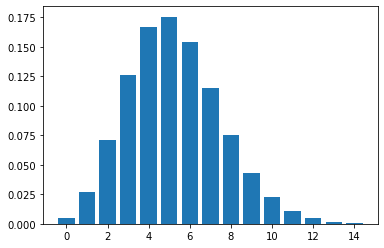

In [88]:
x= np.arange(0,15)
y= stats.binom(n_trials,p).pmf(x)

plt.bar(x,y)
#this shows distribution in bar chart


## Poisson Distribution

- <ins>discrete</ins> probability distribution 
- expresses the probability of a given number of events occurring in a fixed interval of time or space
- No upper bound on number of events (un-like Binomial distribution)
- Only one parameter ($\lambda$,) which is the rate at which the event happens.

- you might see a rate in which trail happens
    - (ex) this happens in 2 hours

#### Real life examples:

Telecommunications: # of calls arriving in to customer service.  

Astronomy: photons arriving at a telescope.

Biology: the number of mutations on a strand of DNA per unit length.  

Management: customers arriving at a counter or call centre.

Finance and insurance: number of losses or claims occurring in a given period of time.  

Radioactivity: number of decays in a given time interval in a radioactive sample.

#### Example
Suppose that astronomers estimate that large meteorites (above a certain size) hit the earth on average once every 100 years (λ = 1 event per 100 years), and that the number of meteorite hits follows a Poisson distribution.

What is the probability of k = 0 meteorite hits in the next 100 years?

In [91]:
#parameter
λ  = 1 #per hundred years
stats.poisson(λ).pmf(0)

0.36787944117144233

Text(0.5, 1.0, 'Poisson distribution $λ = 1$')

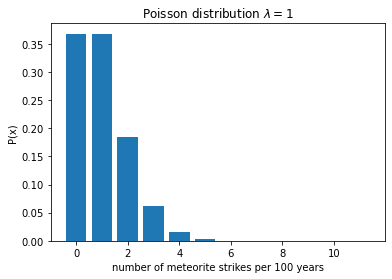

In [96]:
x= np.arange(0,12)
y= stats.poisson(λ).pmf(x)
plt.bar(x,y)
plt.xlabel('number of meteorite strikes per 100 years')
plt.ylabel('P(x)')
plt.title('Poisson distribution $λ = 1$')
#this shows bar distribution for (λ) = 1

#### Mini Exercise:

Average number of customers going through CVS drive-through is 8 per hour. 

1. What kind of distribution we are working with?


2. What are the appropriate defining parameters for this distribution?


3. Create a Scipy object/instance for this distribution



4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the probability that 11 cars customers will go through in next hr.


#### 1. What kind of distribution we are working with?

In [ ]:
#poisson distribution

#### 2. What are the appropriate defining parameters for this distribution?

In [97]:
λ = 8 #per hour

#### 3. Create a Scipy object/instance for this distribution

In [98]:
stats.poisson(λ)

#### 4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the probability that 11 cars customers will go through in next hr.

In [99]:
stats.poisson(λ).pmf(11)

0.07219020642293475

Text(0.5, 1.0, 'Poisson distribution $λ =8$')

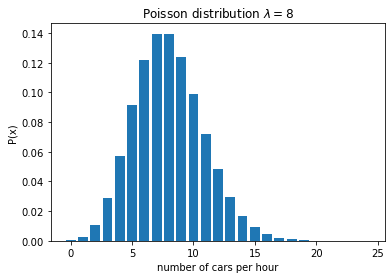

In [102]:
x= np.arange(0,25)
y= stats.poisson(λ).pmf(x)
plt.bar(x,y)
plt.xlabel('number of cars per hour')
plt.ylabel('P(x)')
plt.title('Poisson distribution $λ =8$')

# Summary:

Types of Distribution:
1. Normal distribution
    - mean($\mu$)
    - std dev ($\sigma$)
    - stats.norm($\mu$,  $\sigma$ )


2. Binomial distribution
    - number of trials (n)
    - probability of success (p)
    - stats.binom(n, p )
    - X = number of success in trials


3. Poisson distribution
    - rate ($\lambda$)
    - stats.poisson($\lambda$)
    - X = number of events per unit time
    
 
For a defined probability distribution above, we can answer different questions using following functions:

- pmf/pdf
- cdf/ppf
- sf/isf
